# SpaceTime Simulator
## Curso Deep Learning y Cuda
### Trabajo Voluntario - Fundamentals Of Accelerated Computing for Cuda C/C++
#### Autor: Oscar Noel Amaya Garcia   
#### email: dbanshee@gmail.com

Esta práctica voluntaria se compone de este cuaderno *Jupyter* y el fichero **cudaspsim.cu** con el código correspondiente al motor de simulación utilizando la tecnología **nVidia Cuda**. El cuaderno instala las dependencias necesarias, descarga, compila y ejecuta el motor *Cuda* como un proceso en segundo plano que vuelca información en varios ficheros *json* que sirven de comunicación con el cuaderno para renderizar los resultados.

## Contexto Histórico

Año 2035. Tras  más de una década de increibles avances en inteligencia artificial gracias a revolución tecnológica de *nVidia* con sus *GPUs* cuánticas, los físicos de todo el mundo pudieron realizar experimientos y descubrimientos sin precedentes. Se llegó a controlar la distorsión del *espacio-tiempo* consiguiendo abrir portales entre universos paralelos. Durante varios años la humanidad se lanzó a la exploración espacial en busca de nuevos mundos habitables.

<div style="text-align:center"><img src="images/hyperion.jpeg" /></div>
<br/>

Mientras la tripulación del crucero de exploración **Hyperion VII** se encontraba atravesando un grupo de asteroides en el universo **Volta-773**, un error de precisión de coma flotante desata una reacción en cadena que origina una generaciónes espontáneas de agujeros negros que alteran violentamente sus órbitas haciendo el retorno al portal una tarea imposible.

Rápidamente desde la tierra se desarrolla un programa sobre *Cuda* *(Compute Capability 89)* para poder visualizar la distorsión en el tejido *espacio-temporal* de estas singularidades cambiantes y hacer posible la predicción de las órbitas de asteroides.

La precisa optimización de este código paralelo será vital para que el comandante pueda llevar de regreso a su tripulación de vuelta a nuestro universo.

### Dependencias
Instalación de depencias necesarias para la ejecucion del cuaderno

In [ ]:
# Install Dependencies
!pip install numpy
!pip install matplotlib
!pip install wget

### Código Motor Cuda
El código del motor cuda esta alojado en un servidor privado propiedad del autor para poder automatizar la ejecución del cuaderno jupyter con el código actualizado.
Si se dispone del fichero [cudaspsim.cu](./cudaspsim.cu) en el mismo directorio que el cuaderno, no será necesario este paso. 

Alternativamente podrá estar disponible en GitHub.

Por motivos de acceso a internet si se ejecuta fuera de la intranet del autor, es necesario establecer comprobar el siguiente flag

```python
ARE_IN_BANSHEE_INTRANET = False
```

In [55]:
import wget
import ssl

UPDATE_CUDA_CODE = True
ARE_IN_BANSHEE_INTRANET = False
USE_GITHUB_CUDA_CODE = True

if UPDATE_CUDA_CODE:
    !rm -f cudaspsim
    !rm -f cudaspsim*.cu
    
    if USE_GITHUB_CUDA_CODE:
        url = "..."
    else:
        # Personal Banshee Server. 
        if ARE_IN_BANSHEE_INTRANET:
            url="https://banserver/spacetime_simulator/cuda/cudaspsim.cu"
        else:
            url="https://banserver.bansheerocks.com:9743/spacetime_simulator/cuda/cudaspsim.cu"

    # Ignore Cerfificate
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass # Legacy Python that doesn't verify HTTPS certificates by default
    else:
        # Handle target environment that doesn't support HTTPS verification
        ssl._create_default_https_context = _create_unverified_https_context

    # Download  Source Code
    wget.download(url, 'cudaspsim.cu')

!ls cudaspsim*

cudaspsim.cu


### Compilación Motor Cuda

El desarrollo ha sido mayoritariamente sobre una **nVidia GTX 760** personal con vistas a su ejecución final en la **nVidia V100** del entorno virtual del *DLI*. Se proveen perfiles de compilación para ambas familias.

In [56]:
#!killall cudaspsim
import os

def compileCuda():
    !nvcc -arch=sm_30 -o cudaspsim cudaspsim.cu -lm   # nVidia GTX760
    #!nvcc -arch=sm_70 -o cudaspsim cudaspsim.cu -lm   # nVidia V100
    print("Cuda Code compiled Sucessfully")
    
compileCuda()
!ls cudaspsim*

Cuda Code compiled Sucessfully
cudaspsim  cudaspsim.cu


## El regreso del Hyperion

Tras finalizar la transmisión del código fuente a través del enlace cuántico, el **Hyperion VII** se encuentra preparado para ejecutar el sistema de detección. Los agujeros negros se generan y desaparecen espontáneamente cada **20 segundos**, alterando contínuamente la órbita de los asteroides. La tierra aguarda mientras el comandante se sirve de esta tecnología de última generación sorteando el campo de asteroides. Desde aquí le deseamos la mayor de las suertes. Traiga la tripulación de regreso a casa.

<br/>

Nota técnica:\
La ejecución del motor Cuda se realizará como un **proceso en segundo plano** con una duración máxima de **5 minutos** para prevenir un consumo indefinido de recursos.

Este proceso volcará informacion en varios ficheros *JSON*. 
- **sp.json**: Información de la posición de los agujeros negros y un mapa de valores gravedad en el plano inspeccionado.
- **ast.json**: Información de la posición de los asteroides.

Para evitar que el cuaderno lea los ficheros mientras se escriben, para cada cada uno se mantienen 2 *buffers* de ficheros y se define el activo mediante un *enlace simbólico*. Haciendo de esta manera transparente el acceso por parte del cuaderno.

In [29]:
# Launching Cuda Engine in background
print("Launching Cuda Engine in Background ...")
print("Engine will end en 5 minutes")
os.system("./cudaspsim &")

Launching Cuda Engine in Background ...
Engine will end en 5 minutes


0

## Consola de navegacion
El siguiente código *Python*, lee los ficheros *json* generados por el motor *Cuda* lanzado en segundo plano, renderizando la consola de navegacion. Esto consiste en una matriz donde se establece el valor de la gravedad a modo de campo. Y la posición de los asteroides en cada momento.

Se destacan varios aspectos:
- Por motivos de tiempo la comunicación interproceso entre el motor *Cuda* y esta interfaz *Python* se hace a través de ficheros, generando gráficos en *matplotlib*. **No buscan eficiencia** en cuanto a *FPS*. Solo busca un **fin didáctico y simple**, ya que el **objetivo principal** de esta práctica es el desarrollo del código *C* sobre *Cuda*. Con mas tiempo, la implementación hubieran sido otra consiguiendo una visualización mas natural y eficiente como *sockets*, *memoria compartida* y gráficas interactivas mediante *WebGL* o similar.
- La resolución de la visualización no tiene por que corresponder con la calculada. Se reduce en esta parte para hacer procesado el *matplolib* mas liviano.
- Los cálculos de trayectorias y gravedad no buscan ser exactos sino visualmente aceptables para este ejemplo didáctico manténiendose compucionalmente costosos para poner a prueba el hardware y la capacidades de *Cuda*.
- La simulación se realizará durante un **número definido de iteraciones** para evitar un consumo de recursos excesivo de este cuaderno. No obstante se puede relanzar el simulador y la visualización tantas veces como se desee.

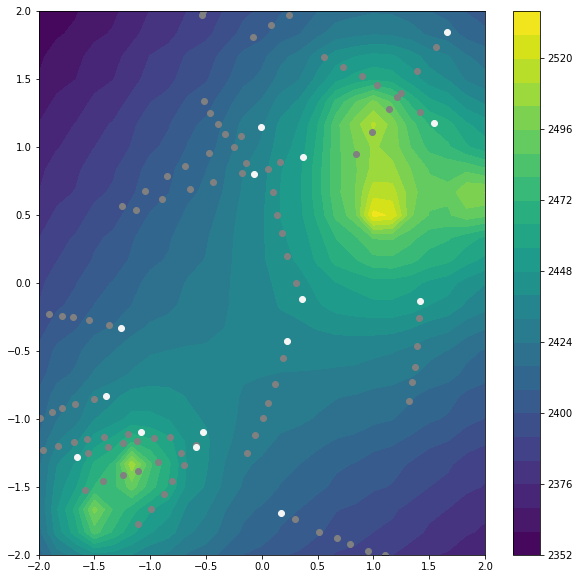

In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import logging
import os
import traceback

logger = logging.getLogger(__name__)

SPACETIME_FILENAME="sp.json"
ASTEROIDS_FILENAME="ast.json"
BOX_LIMITS_X=[-2.0, 2.0]
BOX_LIMITS_Y=[-2.0, 2.0]
BOX_STEP=1
MAX_ASTEROIDS_LEN = 200
SPACEBOX_RES = 25

lastSPDate = None

def trans(x):
    return int(((((x/2)+1)/2)*SPACEBOX_RES))

def printSpaceTime(mplt):
    global lastSPDate
    
    spDate = os.path.getmtime(SPACETIME_FILENAME)
    if True or lastSPDate is None or lastSPDate != spDate:
        with open(SPACETIME_FILENAME) as json_file:
            data = json.load(json_file)
        
    spaceArray=[np.array(ring) for ring in data["space"]]
    blackHoles=[np.array(ring) for ring in data["blackHoles"]]
    
    Z = np.zeros([SPACEBOX_RES, SPACEBOX_RES])
    for r in spaceArray:
        try:
            Z[trans(r[0]), trans(r[1])] = r[2]
        except:
            #None
            logger.error('Exception Trace "%s"', traceback.format_exception(None, e, e.__traceback__))

    mplt.contourf(X, Y, Z, 25)
                

def printAsteroids(mplt):
    global allAsteroids
    
    with open(ASTEROIDS_FILENAME) as json_file:
        data = json.load(json_file)
        asteroids=[np.array(ring) for ring in data["asteroids"]]
    
    allAsteroids.extend(asteroids)
    if len(allAsteroids) > MAX_ASTEROIDS_LEN:
        allAsteroids = allAsteroids[len(allAsteroids)-MAX_ASTEROIDS_LEN:-1]
    
    countAll = len(allAsteroids)
    countLast = len(asteroids)
    
    cnt = 1
    for b in allAsteroids:
        if cnt > countAll - countLast + 1:
            color = "whitesmoke"
        else:
            color = "grey"
                
        try:
            if b[0] >= BOX_LIMITS_Y[0] and b[0] <= BOX_LIMITS_Y[1] and b[1] >= BOX_LIMITS_X[0] and b[1] <= BOX_LIMITS_X[1]:
                mplt.plot(b[1], b[0], "o", c=color)
        except:
            logger.error('Exception Trace "%s"', traceback.format_exception(None, e, e.__traceback__))
            
        cnt = cnt + 1
            
lastSPDate = None
allAsteroids = []
X = np.linspace(BOX_LIMITS_X[0], BOX_LIMITS_X[1], SPACEBOX_RES) # Generar res valores entre (-2.2)
Y = np.linspace(BOX_LIMITS_Y[0], BOX_LIMITS_Y[1], SPACEBOX_RES) # Generar res valores entre (-2.2)

it = 0
try:
    while it < 100:
        try:
            clear_output(wait=True)
            fig = plt.figure(figsize=(10,10))
            printSpaceTime(mplt=plt)
            printAsteroids(mplt=plt)
            plt.colorbar()
            plt.show()

            it = it + 1
        except Exception as e:
            logger.error('Exception Trace "%s"', traceback.format_exception(None, e, e.__traceback__))
    
        time.sleep(0.5)
except KeyboardInterrupt:
    None

## Benchmark

Para poner a prueba diferentes características de la arquitectura soportada por *Cuda*, se ha implementado un *benchmark* que variará diversos parámetros del entorno de simulación y se evaluará sobre diferentes configuraciones para la arquitectura.

Se ejecutan un total de **8 benchmarks** sobre **4 configuraciones** que añaden incrementalmente optimizaciones sobre el código.
<br/>

**Entidades Principales**:
1. **Espacio-Tiempo**. Es una región cartesiana de resolución variable que representa el entorno sobre el que se realizara la simulación. Se evalua la gravedad en cada punto de este espacio en funcion de los agujeros negros presentes en el entorno.
2. **Agujeros Negros**. Cada cierto tiempo, la *CPU* regenera el conjunto de agujeros negros en el espacio cartesiano definido anteriormente. Esto forzará sincronizaciones entre el cálculo de la región de espacio, así como de la memoria entre *CPU-GPU*.
3. **Asteroides**. Un número variable de asteroides circularán en el espacio cartesiano, recalculando su velocidad y trayectoria en función de los agujeros negros presentes.


**Configuraciones**:
- **Config 0**: Configuración base con uso de *Managed Memory* básico con sincronizacion previa y ejecucion de *Cuda Kernels* en el *Default Stream*.
- **Config 1**: Añade *Memory Prefetch Async* entre los accesos cruzados de *CPU-GPU*.
- **Config 2**: Añade ejecución en *Streams* concurrentes para la ejecución de los *kernels*. Ambos son independientes.
- **Config 3**: Añade *Shared Memory* sobre la posición de los *agujeros negros*. Información necesaria que no varía durante la ejecución de los *kernels*.

**Benchmarks**:
Se ejecutan una colección de *benchmarks* sobre todas las configuraciones definidas, calculando para cada uno el número de interaciones en un periodo fijo de tiempo.
Los parametros variables de cada *bechmark* son los siguientes.
1. **spStep**: Resolución de la retícula *Espacio-Tiempo*.
2. **nBlackHoles**: Número de agujeros negros.
3. **nAsteroids** : Número de asteroides
    
La bateria de ejecución elegida es:

| Benchkmark | spStep  | nBlackHoles  | nAsteroids |
| -----------|:-------:| ------------:|-----------:|
| 0          | 0.01    | 100          | 100        |
| 1          | 0.01    | 500          | 500        |
| 2          | 0.01    | 1000         | 1000       |
| 3          | 0.01    | 1000         | 5000       |
| 4          | 0.01    | 100          | 100        |
| 5          | 0.001   | 500          | 500        |
| 6          | 0.001   | 1000         | 1000       |
| 7          | 0.001   | 5000         | 5000       |
| 8          | 0.0005  | 100          | 100        |
| 9          | 0.0005  | 500          | 500        |

## Hardware de Ejecucion

Este cuaderno ha sido desarrollado para ejecutarse sobre el el *hardware* de la plataforma del DLI con una **nVidia Volta V100 de 16GB**. Finalmente antes de realizar la ejecución final del benchmark, el acceso a la plataforma me ha sido restringido. En su lugar se ha ejecutado sobre una mas que modesta **Geforce GTX 760 de 2GB** con un *CCC 3.0* sin la mayoria de las capacidades de la *Volta* para la que habia diseñado el *benchmark*.

In [29]:
print("CPU:")
!cat /proc/cpuinfo | grep 'model name' | uniq
!cat /proc/cpuinfo | grep 'cpu cores' | uniq


print("\nMEMORY:")
!cat /proc/meminfo | grep 'MemTotal'

print("\nGPU:")
!nvidia-smi

CPU:
model name	: Intel(R) Core(TM) i5-3570K CPU @ 3.40GHz
cpu cores	: 4

MEMORY:
MemTotal:       16358728 kB

GPU:
Tue Mar 10 19:00:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 430.50       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 24%   45C    P0    N/A /  N/A |    215MiB /  1998MiB |     N/A      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+---------------------------------------------------

### Ejecucion del Benchmark
Este benchmark ejecuta un total de **9 pruebas** con un tiempo de **30 segundos** cada una para **4 configuraciones** diferentes. Generando como resultado el fichero [benchmark.json](./benchmark.json)

In [57]:
# Run Benchmark
import os
print("Running Benchmark ...")
!./cudaspsim benchmark
print("Benchmark Finished.\n")

Running Benchmark ...
Cuda Space Time Simulator - 2020

  Author: Oscar Noel Amaya Garcia. email: dbanshee@gmail.com
  nVidia DLI - Volunteer practice


GPU Info
 Device: "GeForce GTX 760"
  CUDA Driver Version / Runtime Version          10.1 / 10.1
  CUDA Capability Major/Minor version number:    3.0
  Total amount of global memory:                 1999 MBytes (2095710208 bytes)
  ( 6) Multiprocessors, (192) CUDA Cores/MP:     1152 CUDA Cores
  GPU Max Clock rate:                            1150 MHz (1.15 GHz)
  Maximum Texture Dimension Size (x,y,z)         1D=(65536), 2D=(65536, 65536), 3D=(4096, 4096, 4096)
  Maximum Layered 1D Texture Size, (num) layers  1D=(16384), 2048 layers
  Maximum Layered 2D Texture Size, (num) layers  2D=(16384, 16384), 2048 layers
  Total amount of constant memory:               65536 bytes
  Total amount of shared memory per block:       49152 bytes
  Total number of registers available per block: 65536
  Warp size:                                     32

### Resultados

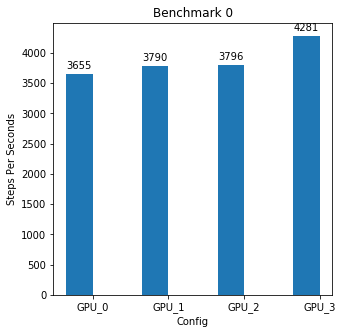

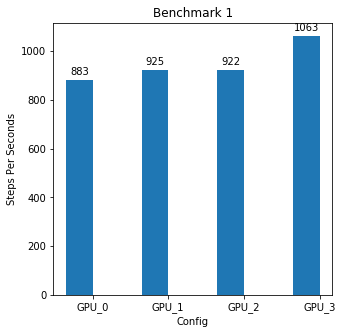

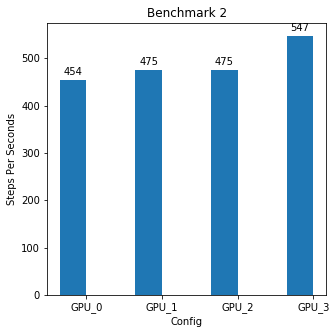

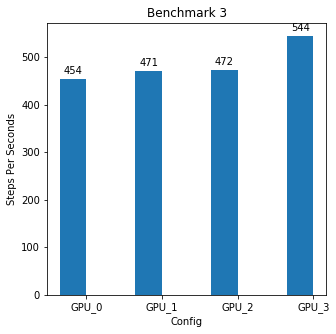

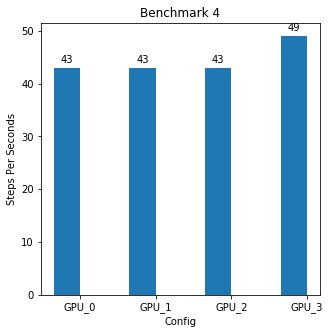

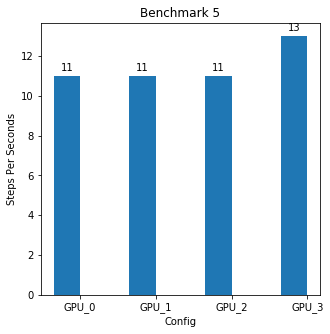

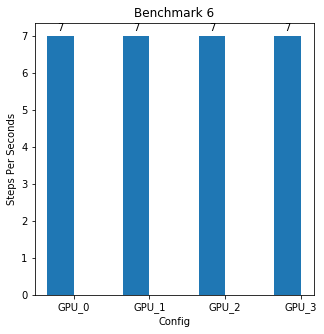

In [65]:
import json
import matplotlib.pyplot as plt
import numpy as np

BENCHMARK_FILENAME = "benchmark.json"
EXCLUDED_BENCHMARKS = [7, 8 ,9]

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def printBenchmark(benchmarks, number):
    width = 0.35  # the width of the bars
    configs = []
    values = []
    for b in benchmarks:
        if b.get("number") == number:
            key = None
            if (b.get("type")) == 0:
                key = "CPU_"
            else:
                key = "GPU_"
            
            key += str(b.get("config"))
            
            configs.append(key)
            values.append(b.get("steps"))
                   
    x = np.arange(len(configs))
    fig, ax = plt.subplots(figsize=(5, 5))
    rects1 = ax.bar(x - width/2, values, width)
    ax.set_xlabel('Config')
    ax.set_ylabel('Steps Per Seconds')
    ax.set_title("Benchmark {}".format(number))
    ax.set_xticks(x)
    ax.set_xticklabels(configs)
    autolabel(rects=rects1, ax=ax)
    plt.show()
    
with open(BENCHMARK_FILENAME) as json_file:
    data = json.load(json_file)
        
benchmarks= data["benchmarks"]
BENCHMARKS_TYPES = 9
for i in range(0, BENCHMARKS_TYPES):
    if not i in EXCLUDED_BENCHMARKS:
        printBenchmark(benchmarks, i)

## Análisis de Resultados

De las gráficas generadas se puede inferir:
1. El rendimiento mejora bajo los diferentes escenarios al aplicar **Memory Prefetch** en los intercambios *CPU-GPU*. Los datos se mueven mientras la *CPU* realiza otro trabajo y en bloques en mayores disminuyendo los fallos en páginas de memoria.
2. El rendimiento apenas mejora al aplicar ejecución de **Kernels paralelos**. Esto se debe a que el tiempo de ejecución del calculo del *espacio-tiempo* es considerablemente mayor al de asteroides, por lo que su  porcentaje en la ejecución total es ínfimo.
3. El rendimiento mejora ostensiblemente al utilizar **Shared Memory**, sobre los elementos mas usados en los cálculos de ambos *kernels*, los agujeros negros.
4. Alcanzado el límite de la tarjeta, con el *benchmark* mas agresivo, el tiempo se degrada, arrojando resultados aproximadamente similares.

## Conclusiones y Posibles Mejoras

Mediante esta práctica ha sido posible investigar y ampliar los conocimientos adquiridos en el curso del *DLI Fundamentals Of Accelerated Computing with Cuda C/C++* llevando al límite esta GPU.

También ha servido para aprender los límites del uso de los recursos del DLI, ya que por desgracia aunque muy amablemente me han disuadido de poder finalizar este trabajo haciendo uso del entorno virtual propio del *DLI* y poder presentar los resultados de todas estas pruebas ejecutándose sobre una **nVidia Volta V100** como era la intención. Es por ello que los resultados finales han sido sobre mi propia **nVidia GeForce GTX 760**.

El código es susceptible de ser mas paralelizado y cacheado, en mas aspectos. Sin embargo en este trabajo he preferido centrarme en 3 caracteristicas. **Memory Prefetch Async**, **Streams** y **Shared Memory**.